## Import Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

warnings.filterwarnings("ignore") #for neat notebook
sns.set_style()

## Load Data

In [2]:
data = pd.read_csv("Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Data Exploration and Visualization

In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum().any()

False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [10]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


<AxesSubplot:>

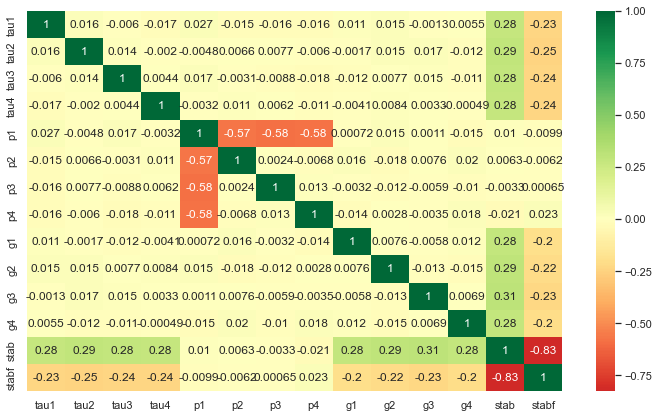

In [11]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), cmap='RdYlGn', annot=True, center=0)

In [12]:
data["stabf"].value_counts()

0    6380
1    3620
Name: stabf, dtype: int64

<AxesSubplot:xlabel='stabf', ylabel='count'>

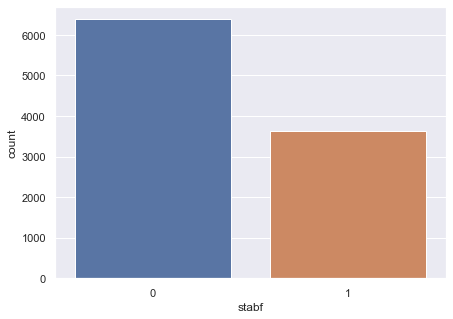

In [13]:
plt.figure(figsize=(7, 5))

sns.countplot(data["stabf"])

In [14]:
data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

## Data Preprocessing

In [15]:
import sklearn.utils
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder

In [16]:
data["stabf"].replace({"stable":1, "unstable":0}, inplace=True)
data["stabf"].head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

In [17]:
data["stabf"] = pd.to_numeric(data["stabf"])

### Undersampling Technique

In [18]:
# Undersampling the target features
df_stable = data[data.stabf == 1]
df_unstable = data[data.stabf == 0].sample(3700)
data_df = pd.concat([df_stable, df_unstable], axis=0)

In [19]:
df_stable.shape, df_unstable.shape, data_df.shape

((3620, 14), (3700, 14), (7320, 14))

In [20]:
# More Preprocessing
X_un = data_df.drop(columns=["stab", "stabf"])
y_un = data_df["stabf"]

### * Oversampling Technique

In [21]:
df_class_1 = data[data.stabf == 1]
df_class_0 = data[data.stabf == 0]

count_class_0, count_class_1 = data.stabf.value_counts()
count_class_0, count_class_1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
new_data = pd.concat([df_class_1_over, df_class_0], axis=0)

new_data.stabf.value_counts()

1    6380
0    6380
Name: stabf, dtype: int64

In [22]:
# More Preprocessing
X_ov = new_data.drop(columns=["stab", "stabf"])
y_ov = new_data["stabf"]

X_ov.shape, y_ov.shape

((12760, 12), (12760,))

### Smote Technique

In [23]:
from imblearn.over_sampling import SMOTE

In [25]:
# More Preprocessing
X_sm = data_df.drop(columns=["stab", "stabf"])
y_sm = data_df["stabf"]

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X_sm, y_sm)

X_sm.shape, y_sm.shape

((7400, 12), (7400,))

## Modelling

In [26]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import VotingClassifier

In [27]:
clf1 = XGBClassifier(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = LGBMClassifier(random_state=42)

In [48]:
def Voting_model(X, y, clf1, clf2, clf3, clf4, clf5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = VotingClassifier([('c1', clf1),('c2f', clf2),('c3',clf3), ('c4',clf4), ('c5',clf5)], weights=(1,1,1,1,1))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)  
    
    return y_pred, cm, print(class_report), model, y_test, 

### Model Evaluation For The 3 Techniques

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [49]:
# For Under sampling
Voting_model(X_un, y_un, clf1, clf2, clf3, clf4, clf5)

[12:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       740
           1       0.90      0.94      0.92       724

    accuracy                           0.92      1464
   macro avg       0.92      0.92      0.92      1464
weighted avg       0.92      0.92      0.92      1464



(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([[665,  75],
        [ 43, 681]], dtype=int64),
 None,
 VotingClassifier(estimators=[('c1',
                               XGBClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             enable_categorical=False,
                                             gamma=None, gpu_id=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None,
                                             max_delta_step=None, max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constrain

In [50]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

NameError: name 'cm' is not defined

In [30]:
# For Over sampling
Voting_model(X_ov, y_ov, clf1, clf2, clf3, clf4, clf5)

[12:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1276
           1       0.95      0.98      0.97      1276

    accuracy                           0.97      2552
   macro avg       0.97      0.97      0.97      2552
weighted avg       0.97      0.97      0.97      2552



(array([0, 1, 0, ..., 1, 0, 1], dtype=int64), None)

In [31]:
# For SMOTE
Voting_model(X_sm, y_sm, clf1, clf2, clf3, clf4, clf5)

[12:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       740
           1       0.91      0.94      0.92       740

    accuracy                           0.92      1480
   macro avg       0.92      0.92      0.92      1480
weighted avg       0.92      0.92      0.92      1480



(array([0, 1, 1, ..., 0, 1, 1], dtype=int64), None)

In [34]:
# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

NameError: name 'y_test' is not defined

In [51]:
# Feature importance
impo_df = pd.DataFrame({'feature': X_ov.columns, 'importance': model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

NameError: name 'model' is not defined